# Lista de Exercícios 1: Processos de Decisão de Markov e Programação Dinâmica

#### Disciplina: Aprendizado por Reforço
#### Professor: Luiz Chaimowicz
#### Monitores: Marcelo Lemos e Ronaldo Vieira

---

## Instruções

- ***SUBMISSÕES QUE NÃO SEGUIREM AS INSTRUÇÕES A SEGUIR NÃO SERÃO AVALIADAS.***
- Leia atentamente toda a lista de exercícios e familiarize-se com o código fornecido antes de começar a implementação.
- Os locais onde você deverá escrever suas soluções estão demarcados com comentários `# YOUR CODE HERE` ou `YOUR ANSWER HERE`.
- **Não altere o código fora das áreas indicadas, nem adicione ou remova células. O nome deste arquivo também não deve ser modificado.**
- Antes de submeter, certifique-se de que o código esteja funcionando do início ao fim sem erros.
- Submeta apenas este notebook (*ps1.ipynb*) com as suas soluções no Moodle.
- Prazo de entrega: 23/09/2025. Submissões fora do prazo terão uma penalização de -20% da nota final por dia de atraso.
- Utilize a [documentação do Gymnasium](https://gymnasium.farama.org/) para auxiliar sua implementação.
- Em caso de dúvidas entre em contato pelo fórum "Dúvidas com relação aos exercícios e trabalho de curso" no moodle da Disciplina.

---

## Frozen Lake

O ambiente Frozen Lake é uma simulação clássica utilizada para treinamento de agentes em aprendizado por reforço. Neste ambiente, o agente navega por um lago congelado representado por um grid de tamanho $n \times m$, com o objetivo de alcançar um alvo. O lago contém dois tipos de células: (1) células com gelo sólido, que são seguras para o agente se mover, e (2) as células com buracos, nas quais o agente cai e falha a missão. Embora o Gymnasium já possua uma implementação do Frozen Lake, neste exercício iremos implementá-lo do zero.

No início de cada episódio, o agente é posicionado na célula $[0, 0]$ enquanto o alvo é posicionado na célula mais distante do agente, na posição $[n-1, m-1]$ em um mapa de tamanho $n \times m$. A cada passo, o agente recebe uma observação indicando sua posição atual no lago e tem a possibilidade de escolher entre quatro ações possíveis: mover-se para cima, para baixo, para a esquerda ou para a direita. No entanto, devido à superfície escorregadia do lago, ele nem sempre se move na direção desejada, podendo acabar se movendo em uma direção perpendicular à escolhida. O agente recebe uma recompensa de 1 se alcançar o alvo e zero em todos os outros estados. Um episódio termina quando o agente alcança o objetivo ou cai na água.

Neste exercício, vamos trabalhar sempre com o mesmo mapa $4 \times 4$, representado na figura abaixo.

![Frozen Lake Map](https://gymnasium.farama.org/_images/frozen_lake.gif)

Sua primeira tarefa será implementar o ambiente Frozen Lake utilizando o arcabouço fornecido pelo Gymnasium. Abaixo, você encontrará um código inicial que deverá ser utilizado em sua implementação. Siga essas instruções para garantir que seu código está de acordo com o esperado:

1. Na função `__init__`, já definimos o mapa que será utilizado e armazenamos essa informação na variável `_description`. Nesse mapa, a letra 'S' representa a posição inicial do agente, a letra 'G' indica o alvo, as letras 'F' representam gelo sólido (que é seguro) e as letras 'H' marcam os buracos. No entanto, ainda é necessário adicionar mais algumas informações no ambiente, especificamente sobre a representação das observações e das ações. Embora existam várias maneiras de representar os espaços de observações e de ação, neste exercício, você deve usar a forma mais simples possível, que pode ser representada por um único valor discreto. Na função `__init__`, defina o espaço de observações e o espaço de ações, atribuindo-os às variáveis `self.observation_space` e `self.action_space`, respectivamente. Utilize apenas a classe `gymnasium.spaces.Discrete` nesta tarefa.

2. Antes de prosseguirmos com as funcionalidades do gymnasium, vamos implementar algumas funções auxiliares para facilitar as próximas etapas. Implemente a função `_get_obs`, que retorna a observação atual do ambiente. Além disso, implemente a função `_set_state`, que recebe um valor inteiro correspondente a uma posição no lago e coloca o agente nesta localização.

3. A função `reset` deve resetar o ambiente e inicializar um novo episódio, posicionando o agente na célula $[0, 0]$ e fazendo todos os ajustes internos necessários. Esta função deve retornar uma tupla contendo a observação inicial e as informações do ambiente. Neste exercício, vamos retornar um dicionario vazio `{}` para as informações. Lembre-se que a observação deve ser um único valor discreto, como definido no item 1. Implemente a função `reset`.

4. A função `step()` é responsável por atualizar o ambiente com base na ação executada pelo agente. Ela recebe como entrada a ação escolhida pelo agente, um parâmetro seed e uma variável options, e calcula o novo estado atual com base na função de transição previamente definida. Neste exercício, você pode ignorar os parâmetros seed e options, pois não precisaremos deles. Neste ambiente que estamos desenvolvendo, o agente tem 80% de chance de se mover na direção desejada e 20% de chance de se mover em uma direção perpendicular à escolhida, distribuída igualmente entre os dois sentidos possíveis (10% para cada um). **As ações do agente devem ser representadas pelos valores 0 (mover-se para a esquerda), 1 (mover-se para baixo), 2 (mover-se para a direita) e 3 (mover-se para cima)**. Caso o agente tente se mover para fora do mapa, ele permanecerá na mesma posição. Além disso, a função atribui uma recompensa ao agente e verifica se o episódio chegou ao fim. Implemente a função step() para que ela retorne a observação do estado atual, a recompensa recebida, um valor booleano indicando se o estado é terminal, um valor booleano informando se o episódio foi truncado e as informações do ambiente. Esses dois últimos valores são necessários devidio à interface estabelecida pelo gymnasium, mas não se preocupe com eles; apenas retorne sempre `False` e `{}` para eles.

In [1]:
import sys
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

In [2]:
class FrozenLake(gym.Env):
    def __init__(self):
        """
        Initializes the Frozen Lake environment.
        [cite_start]This follows the setup for a standard MDP as described in the course materials. [cite: 1773, 1779]
        """
        self._description = np.asarray([
            "SFFF",
            "FHFH",
            "FFFH",
            "HFFG"
        ], dtype='c')

        # Get the dimensions of the grid from the description.
        self.n_rows, self.n_cols = self._description.shape

        # The number of states is the total number of cells in the grid.
        n_states = self.n_rows * self.n_cols
        # There are four discrete actions: Left, Down, Right, Up.
        n_actions = 4

        # Define the observation space as a discrete set of states from 0 to n_states-1.
        # [cite_start]This is a standard representation for tabular methods. [cite: 1789]
        self.observation_space = gym.spaces.Discrete(n_states)

        # Define the action space as a discrete set of actions from 0 to n_actions-1.
        self.action_space = gym.spaces.Discrete(n_actions)

        # Initialize the agent's position. This will be updated in reset().
        self._agent_pos = 0

    def _get_obs(self) -> int:
        """
        Returns the current observation of the environment, which is the agent's position.
        """
        # The observation is the integer representation of the agent's current state.
        return self._agent_pos

    def _set_state(self, state: int):
        """
        Sets the agent's current state (position).

        Args:
            state (int): The integer representing the new state.
        """
        # Validate that the state is within the bounds of the observation space.
        if not self.observation_space.contains(state):
            raise ValueError(f"Invalid state {state} for this environment.")

        # Update the agent's position.
        self._agent_pos = state

    def reset(self, seed: int = None, options: dict = None) -> tuple[int, dict]:
        """
        Resets the environment to the initial state for a new episode.

        Returns:
            A tuple containing the initial observation and an empty info dictionary.
        """
        # The super().reset() call handles the seeding of the random number generator.
        super().reset(seed=seed)

        # The agent always starts at state 0, corresponding to the 'S' tile.
        self._agent_pos = 0

        # Return the initial observation and an empty info dictionary as per Gymnasium API.
        return self._get_obs(), {}

    def step(self, action: int) -> tuple[int, float, bool, bool, dict]:
        """
        Executes one time step in the environment based on the given action.
        [cite_start]This function implements the transition probability p(s', r|s, a). [cite: 1781]

        Args:
            action (int): The action taken by the agent.

        Returns:
            A tuple containing the next observation, reward, terminated flag, truncated flag, and an empty info dictionary.
        """
        # Mapping of actions to coordinate changes (row, col).
        # 0: Left, 1: Down, 2: Right, 3: Up
        action_to_delta = {
            0: (0, -1),  # Left
            1: (1, 0),   # Down
            2: (0, 1),   # Right
            3: (-1, 0)   # Up
        }

        # Define probabilities for the slippery (stochastic) transitions.
        # The agent moves in the intended direction with 80% probability.
        # The remaining 20% is split between the two perpendicular directions.
        intended_prob = 0.8
        perp_prob = 0.1

        # The two perpendicular actions for each intended action.
        perp_actions = {0: [3, 1], 1: [0, 2], 2: [1, 3], 3: [0, 1]}

        # Determine the actual direction of movement based on stochasticity.
        if self.np_random.random() < intended_prob:
            # Move in the intended direction.
            move = action
        else:
            # Slip and move in one of the perpendicular directions.
            move = self.np_random.choice(perp_actions[action])

        # Get the current position (row, col) from the agent's state.
        current_row, current_col = divmod(self._agent_pos, self.n_cols)

        # Calculate the potential new position based on the chosen move.
        delta_row, delta_col = action_to_delta[move]
        new_row = current_row + delta_row
        new_col = current_col + delta_col

        # Check for boundary conditions. If the agent hits a wall, it stays put.
        if not (0 <= new_row < self.n_rows and 0 <= new_col < self.n_cols):
            new_row, new_col = current_row, current_col

        # Update the agent's state (position).
        self._agent_pos = new_row * self.n_cols + new_col

        # Determine the outcome of the move.
        cell_type = self._description[new_row, new_col]

        # A terminal state is reached if the agent is at the goal or in a hole.
        terminated = (cell_type == b'G' or cell_type == b'H')

        # Reward is 1 only if the goal is reached.
        reward = 1.0 if cell_type == b'G' else 0.0

        # Truncation is not used in this environment.
        truncated = False

        # The info dictionary is empty.
        info = {}

        return self._get_obs(), reward, terminated, truncated, info

Certifique-se que seu ambiente funciona na célula abaixo.

**Atenção:** os testes fornecidos não cobrem todos os casos possíveis. Realize testes adicionais para garantir a implementação correta.

In [3]:
env = FrozenLake()

obs, info = env.reset()
assert obs == 0, f"Observação inicial esperada 0, recebeu {obs}"

env._set_state(5)
obs = env._get_obs()
assert obs == 5, f"Estado esperado 5, recebeu {obs}"

for _ in range(30):
    action = env.action_space.sample()
    assert 0 <= action < 4, f"Ação fora do intervalo esperado: {action}"

    obs, reward, terminated, truncated, info = env.step(action)

    assert 0 <= obs < 16, f"Observação fora do intervalo esperado: {obs}"
    assert reward in [0, 1], f"Recompensa inválida: {reward}"
    assert isinstance(terminated, bool), f"'terminated' deve ser bool, mas recebeu {type(terminated)}"
    assert truncated is False, f"'truncated' deve ser False, mas recebeu {truncated}"
    assert isinstance(info, dict), f"'info' deve ser dict, mas recebeu {type(info)}"

In [4]:
# Não altere ou remova esta célula

In [5]:
# Não altere ou remova esta célula

## Policy Iteration

Agora que estamos familiarizados com o ambiente Frozen Lake, nosso objetivo será encontrar uma política ótima para ele.  Desta vez, utilizaremos a versão oficial do Frozen Lake, disponibilizado pelo Gymnasium. Ele possui algumas propriedades que facilitarão as próximas implementações. Sua tarefa será implementar o algoritmo *Policy Iteration*, conforme ilustrado abaixo.

![Policy Iteration](policy_iteration.png)

5. A implementação será realizada em etapas. Comece implentando a função `init_policy_iteration`, que inicializa e retorna dois arrays. O primeiro array armazenará os valores esperados de cada estado $V(s)$, enquanto o segundo conterá a política do agente: para cada estado, ele indicará a ação que o agente deve realizar. Ambos os arrays devem ser inicializados com zeros.

In [6]:
def init_policy_iteration(env: gym.Env) -> tuple[np.ndarray[float], np.ndarray[int]]:
    """
    Initializes the value function (V) and policy arrays for the Policy Iteration algorithm.
    This corresponds to the 'Initialization' step in the Policy Iteration pseudocode.


    Args:
        env: The Gymnasium environment.

    Returns:
        A tuple containing the initialized V-table and policy array.
    """
    # Get the total number of states from the environment's observation space.
    n_states = env.observation_space.n

    # Initialize the value function array (V-table) with zeros for all states.
    # This provides a neutral starting point for evaluation.
    V = np.zeros(n_states, dtype=float)

    # Initialize the policy array with zeros. This means the initial policy
    # is to take action 0 (Left) for all states, but it will be updated.
    policy = np.zeros(n_states, dtype=int)

    return V, policy

6. Agora, vamos computar o valor esperado $V(s) = \sum_{s', r}p(s',r|s, a)[r + \gamma V(s')]$. Implemente a função `compute_expected_value`que recebe como parâmetros o ambiente, o vetor $V$, um estado, uma ação, o valor de $\gamma$ (fator de desconto), e retorna o valor esperado. Não altere os valores de $V$ nesta função.

**Importante:** A variável `env.unwrapped.P[state][action]` contém as transições do ambiente, retornando uma lista com todas as transições possíveis para o par (state, action). Cada elemento dessa lista inclui, na seguinte ordem: a probabilidade da transição, o estado $s'$ alcançado, a recompensa recebida e um indicador de estado terminal. 

In [7]:
def compute_expected_value(env: gym.Env, V: np.ndarray[float], state: int, action: int, gamma: float) -> float:
    """
    Computes the expected value of a state-action pair, q(s, a).
    This function calculates the sum over all possible next states and rewards:
    sum_{s', r} p(s', r|s, a)[r + gamma * V(s')].
    This is a core calculation used in both policy evaluation and improvement.


    Args:
        env: The Gymnasium environment.
        V: The current value function array.
        state: The current state (s).
        action: The action being evaluated (a).
        gamma: The discount factor.

    Returns:
        The expected value (q-value) of the state-action pair.
    """
    expected_value = 0.0

    # env.unwrapped.P[state][action] provides the transition model p(s', r|s, a).
    # It returns a list of tuples: (probability, next_state, reward, terminated_flag).
    for prob, next_state, reward, _ in env.unwrapped.P[state][action]:
        # This line directly implements the formula's core component.
        expected_value += prob * (reward + gamma * V[next_state])

    return expected_value

7. O pŕoximo passo será avaliar a política do agente. Implemente o loop de avaliação de política do policy iteration na função `evaluate_policy`. Ela receberá o ambiente, a política do agente, o vetor $V$, o valor $\gamma$, e o valor $\theta$. Esta função não precisa retornar nada.

In [8]:
def evaluate_policy(env: gym.Env, policy: np.ndarray[int], V: np.ndarray[float], gamma: float, theta: float) -> None:
    """
    Performs the Policy Evaluation step of the Policy Iteration algorithm.
    It iteratively updates the value function V for a given policy until the
    change in value is smaller than the threshold theta.


    Args:
        env: The Gymnasium environment.
        policy: The policy to be evaluated.
        V: The value function array to be updated.
        gamma: The discount factor.
        theta: The convergence threshold.
    """
    while True:
        # Initialize delta to track the maximum change in V in a single sweep.
        delta = 0

        # Iterate through all states in the environment.
        for state in range(env.observation_space.n):
            # Store the old value of the state to measure the change.
            old_v = V[state]

            # Get the action to be taken in the current state according to the policy.
            action = policy[state]

            # Update the value of the current state using the Bellman equation for v_pi.
            # This is an 'expected update' as it averages over all possible outcomes.
            V[state] = compute_expected_value(env, V, state, action, gamma)

            # Update delta with the absolute difference.
            delta = max(delta, abs(old_v - V[state]))

        # If the maximum change is less than the threshold, the value function has converged.
        if delta < theta:
            break

8. A seguir, vamos implementar a atualização da política. Na função `improve_policy` implemente uma iteração da atualização da política. Ela recebe o ambiente, a política do agente, o vetor $V$, e o valor $\gamma$. Ela deverá retornar um booleano indicando se política está estável.

In [9]:
def improve_policy(env: gym.Env, policy: np.ndarray[int], V: np.ndarray[float], gamma: float) -> bool:
    """
    Performs the Policy Improvement step of the Policy Iteration algorithm.
    It updates the policy to be greedy with respect to the current value function V.


    Args:
        env: The Gymnasium environment.
        policy: The policy array to be updated.
        V: The current value function array.
        gamma: The discount factor.

    Returns:
        A boolean indicating whether the policy remained stable (True) or was changed (False).
    """
    policy_stable = True

    # Iterate through all states to update the policy for each one.
    for state in range(env.observation_space.n):
        # Store the action specified by the old policy.
        old_action = policy[state]

        # Find the best action by calculating the expected value for all possible actions
        # and selecting the one with the highest value (argmax).
        action_values = [compute_expected_value(env, V, state, action, gamma) for action in range(env.action_space.n)]
        policy[state] = np.argmax(action_values)

        # If the action for this state has changed, the policy is not yet stable.
        if old_action != policy[state]:
            policy_stable = False

    return policy_stable

A célula abaixo implementa a estrutura do algoritmo *Policy Iteration* utilizando as funções desenvolvidas nas etapas anteriores. Não é necessário realizar nenhuma implementação nesta parte.

In [10]:
def policy_iteration(env: gym.Env, gamma: float, theta: float) -> tuple[np.ndarray[float], np.ndarray[int]]:
    V, policy = init_policy_iteration(env)

    while True:
        evaluate_policy(env, policy, V, gamma, theta)
        policy_stable = improve_policy(env, policy, V, gamma)
        if policy_stable:
            break
    return V, policy

In [11]:
def print_policy(env:gym.Env, policy: np.ndarray[int]):
    """
    Exibe a política de um ambiente FrozenLake de forma visual.

    Parâmetros:
    -----------
    env : gym.Env
        Ambiente do tipo FrozenLake.
    policy : np.ndarray
        Array 1D contendo as ações a serem tomadas em cada estado.

    Ações são mapeadas para setas:
        0: '←', 1: '↓', 2: '→', 3: '↑'

    Símbolos especiais do mapa:
        'H': buraco → '▢'
        'G': objetivo → '◎'
    """

    ACTION_MAP = ['←', '↓', '→', '↑']
    HOLE_SYMBOL = '▢'
    GOAL_SYMBOL = '◎'

    n_rows, n_cols = env.unwrapped.desc.shape
    policy_grid = np.full((n_rows, n_cols), "", dtype=str)

    for index, action in enumerate(policy):
        row, col = divmod(index, 4)
        cell = env.unwrapped.desc[row, col]
        if cell == b'H':
            policy_grid[row, col] = HOLE_SYMBOL
        elif cell == b'G':
            policy_grid[row, col] = GOAL_SYMBOL
        else:
            policy_grid[row, col] = ACTION_MAP[action]

    np.savetxt(sys.stdout, policy_grid, fmt='%s', delimiter=' ')

A célula abaixo irá executar seu algoritmo *Policy Iteration* em um ambiente Frozen Lake determinístico, ou seja, onde o agente não corre o risco de escorregar para direções indesejadas. A política resultante será armazenada na variável `policy_iteration_deterministic`, que usaremos em outra tarefa. Certifique-se que o algoritmo esteja funcionando corretamente e que a política gerada corresponda ao comportamento esperado neste ambiente.

In [12]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)
V, policy_iteration_deterministic = policy_iteration(env, gamma=0.99, theta=1e-8)
print_policy(env, policy_iteration_deterministic)
env.close()

assert np.array_equal(policy_iteration_deterministic, [1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0]), "Política diferente da esperada"

↓ → ↓ ←
↓ ▢ ↓ ▢
→ ↓ ↓ ▢
▢ → → ◎


In [13]:
# Não altere ou remova esta célula

## Value Iteration

Neste exercício vamos encontrar uma política ótima para o Frozen Lake utilizando o algoritmo *Value Iteration* como descrito abaixo.

![Value Iteration](value_iteration.png)

9. Novamente, vamos dividir este exercícios em etapas menores. O primeiro passo consiste em inicializar o vetor $V$, que armazenará os valores esperados para cada estado. Para isso, implemente a função `init_value_iteration`, que recebe um ambiente como parâmetro e retorna o vetor $V$. Este vetor deve ser inicializado com valores zero.

In [14]:
def init_value_iteration(env: gym.Env) -> np.ndarray[float]:
    """
    Initializes the value function (V) array for the Value Iteration algorithm.
    This corresponds to the 'Initialization' step in the Value Iteration pseudocode.


    Args:
        env: The Gymnasium environment.

    Returns:
        The initialized V-table.
    """
    # Get the total number of states from the environment's observation space.
    n_states = env.observation_space.n

    # Initialize the value function array (V-table) with zeros for all states.
    # A zero initialization is a standard starting point for this algorithm.
    V = np.zeros(n_states, dtype=float)

    return V

10. Agora, vamos gerar uma política determinística a partir de um vetor $V$, conforme definido pela equação $\pi(s)= \textrm{argmax}_a \sum_{s', r}p(s', r|s, a)[r + \gamma V(s')]$. Implemente a função `generate_policy`, que recebe um ambiente e um vetor $V$, retornando a política determinística resultante.

**Dica:** Utilize a função `compute_expected_value` do exercício anterior para facilitar sua implementação.

In [15]:
def generate_policy(env: gym.Env, V: np.ndarray[float], gamma: float) -> np.ndarray[int]:
    """
    Generates a deterministic policy from a given value function V.
    This function implements the policy extraction step shown in the Value Iteration pseudocode.
    pi(s) = argmax_a sum_{s', r} p(s', r|s, a)[r + gamma * V(s')]


    Args:
        env: The Gymnasium environment.
        V: The value function array.
        gamma: The discount factor.

    Returns:
        The resulting deterministic policy array.
    """
    n_states = env.observation_space.n
    policy = np.zeros(n_states, dtype=int)

    # Iterate over all states to determine the best action for each.
    for state in range(n_states):
        # For each state, compute the expected value of taking each possible action.
        action_values = [compute_expected_value(env, V, state, action, gamma)
                         for action in range(env.action_space.n)]

        # The best action is the one that maximizes the expected value.
        policy[state] = np.argmax(action_values)

    return policy

11. Por fim, implemente o loop principal do *Value Iteration* na função `value_iteration`. Ela deverá retornar, nesta ordem, o array de valores $V$ e a política obtida.

In [16]:
def value_iteration(env: gym.Env, gamma: float, theta: float) -> tuple[np.ndarray[float], np.ndarray[int]]:
    """
    Performs the Value Iteration algorithm to find the optimal value function and policy.
    This implementation directly follows the complete algorithm shown in the pseudocode.


    Args:
        env: The Gymnasium environment.
        gamma: The discount factor.
        theta: The convergence threshold.

    Returns:
        A tuple containing the optimal value function array and the optimal policy array.
    """
    # Initialize the value function.
    V = init_value_iteration(env)

    while True:
        # Initialize delta to track the maximum change in V in a single sweep.
        delta = 0

        # Iterate through each state for the update.
        for state in range(env.observation_space.n):
            # Store the old value to measure the change.
            old_v = V[state]

            # Compute the expected value for all possible actions from the current state.
            action_values = [compute_expected_value(env, V, state, action, gamma)
                             for action in range(env.action_space.n)]

            # The Bellman optimality update: V(s) is updated with the max action value.
            # This combines the evaluation and improvement steps into one.
            V[state] = np.max(action_values)

            # Update delta with the absolute difference.
            delta = max(delta, abs(old_v - V[state]))

        # If the value function has converged, exit the loop.
        if delta < theta:
            break

    # Once the optimal value function is found, extract the optimal policy.
    policy = generate_policy(env, V, gamma)

    return V, policy

A célula abaixo irá executar seu algoritmo *Value Iteration* em um ambiente Frozen Lake determinístico. A política resultante será armazenada a variável `value_iteration_deterministic`, que usaremos em outra tarefa. Certifique-se que ele esteja funcionando corretamente e que a política gerada corresponda ao comportamento esperado neste ambiente.

In [17]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)
V, value_iteration_deterministic = value_iteration(env, gamma=0.99, theta=1e-8)
print_policy(env, value_iteration_deterministic)
env.close()

assert np.array_equal(value_iteration_deterministic, [1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0]), "Política diferente da esperada"

↓ → ↓ ←
↓ ▢ ↓ ▢
→ ↓ ↓ ▢
▢ → → ◎


In [18]:
# Não altere ou remova esta célula

## Análise

Agora, executaremos seus algoritmos no mesmo ambiente do Frozen Lake, porém escorregadio. As políticas resultante serão armazenadas nas variáveis `policy_iteration_slippery` e `value_iteration_slippery`, que usaremos na tarefa 14. Nesse cenário, o agente tem apenas 1/3 de chance de se mover na direção desejada e 2/3 de chance de se mover em uma direção perpendicular. Observe as políticas resultantes.

In [19]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=True)
V, policy_iteration_slippery = policy_iteration(env, gamma=0.99, theta=1e-8)
print("Policy Iteration")
print_policy(env, policy_iteration_slippery)
env.close()

Policy Iteration
← ↑ ↑ ↑
← ▢ ← ▢
↑ ↓ ← ▢
▢ → ↓ ◎


In [20]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=True)
V, value_iteration_slippery = value_iteration(env, gamma=0.99, theta=1e-8)
print("Value Iteration")
print_policy(env, value_iteration_slippery)
env.close()

Value Iteration
← ↑ ↑ ↑
← ▢ ← ▢
↑ ↓ ← ▢
▢ → ↓ ◎


12. Implemente a função `execute_policy` abaixo, que deve executar uma política previamente obtida em um ambiente Frozen Lake por $N$ episódios, retornando a recompensa acumulada de cada episódio e suas durações.

In [21]:
def execute_policy(env: gym.Env, policy: np.ndarray[int], n_episodes):
    episode_returns = []
    episode_lengths = []

    for episode in range(n_episodes):
        total_reward = 0
        step_count = 0

        state, _ = env.reset()
        done = False

        while not done:
            # Select the action for the current state according to the given policy.
            # This is the core of executing a deterministic policy.
            action = policy[state]

            # Take the action in the environment to get the next state, reward, and termination status.
            next_state, reward, terminated, truncated, info = env.step(action)

            # Accumulate the reward for the current episode.
            total_reward += reward

            # Increment the step counter.
            step_count += 1

            # The episode ends if the state is terminal (terminated or truncated).
            done = terminated or truncated

            # Move to the next state for the next iteration.
            state = next_state

        episode_returns.append(total_reward)
        episode_lengths.append(step_count)
    return episode_returns, episode_lengths

13. Utilize a função `execute_policy` para avaliar a política obtida pelo Policy Iteration no Frozen Lake **determinístico** (`policy_iteration_deterministic`) em um ambiente Frozen Lake escorregadio por 10 episódios. Armazene as recompensas acumuladas ao longo dos episódios na variável `agent_1_returns` e a duração dos episódios na variável `agent_1_lengths`. Observe o comportamento do agente durante a execução.

In [22]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=True, render_mode="human")

# Execute the deterministic policy in the slippery environment for 10 episodes.
# The results (rewards and lengths) are stored in the specified variables.
#
agent_1_returns, agent_1_lengths = execute_policy(env, policy_iteration_deterministic, n_episodes=10)

env.close()

14. Repita o procedimento da tarefa anterior, desta vez utilizando a política obtida pelo Policy Iteration no Frozen Lake **escorregadio** (`policy_iteration_slippery`). Armazene as recompensas acumuladas ao longo dos episódios na variável `agent_2_returns` e a duração dos episódios na variável `agent_2_lengths`. Observe o comportamento do agente durante a execução.

In [ ]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=True, render_mode="human")

# Execute the slippery-trained policy in the slippery environment for 10 episodes.
# This evaluates how the policy optimized for stochasticity performs.
agent_2_returns, agent_2_lengths = execute_policy(env, policy_iteration_slippery, n_episodes=10)

env.close()

Analise a seguinte comparação entre as recompensas e a duração obtidas por cada uma dessas duas execuções no Frozen Lake escorregadio.

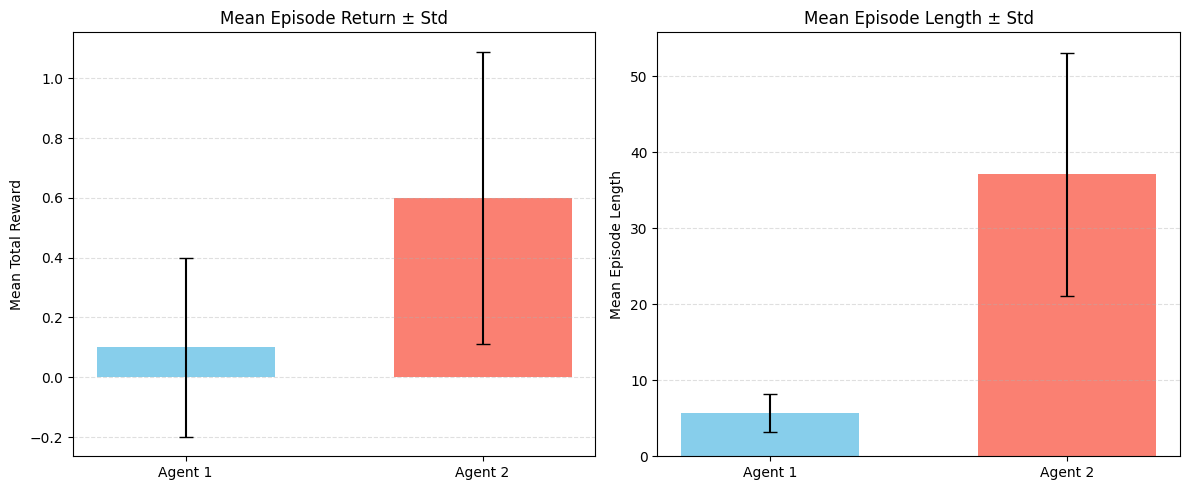

In [ ]:
def compare_policy(
    rewards_run1, lengths_run1,
    rewards_run2, lengths_run2,
    label_run1="Agent 1", label_run2="Agent 2"
):
    """
    Compare two policy runs using mean return and mean episode length.

    Args:
        rewards_run1 (list): Episode rewards for run 1.
        lengths_run1 (list): Episode lengths for run 1.
        rewards_run2 (list): Episode rewards for run 2.
        lengths_run2 (list): Episode lengths for run 2.
        label_run1 (str): Label for run 1.
        label_run2 (str): Label for run 2.
    """

    mean_rewards = [np.mean(rewards_run1), np.mean(rewards_run2)]
    std_rewards  = [np.std(rewards_run1), np.std(rewards_run2)]

    mean_lengths = [np.mean(lengths_run1), np.mean(lengths_run2)]
    std_lengths  = [np.std(lengths_run1), np.std(lengths_run2)]

    labels = [label_run1, label_run2]
    x = np.arange(len(labels))
    width = 0.6

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Mean Rewards
    axes[0].bar(x, mean_rewards, yerr=std_rewards, capsize=5, width=width, color=['skyblue', 'salmon'])
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(labels)
    axes[0].set_ylabel("Mean Total Reward")
    axes[0].set_title("Mean Episode Return ± Std")
    axes[0].grid(True, axis="y", linestyle="--", alpha=0.4)

    # Mean Episode Lengths
    axes[1].bar(x, mean_lengths, yerr=std_lengths, capsize=5, width=width, color=['skyblue', 'salmon'])
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(labels)
    axes[1].set_ylabel("Mean Episode Length")
    axes[1].set_title("Mean Episode Length ± Std")
    axes[1].grid(True, axis="y", linestyle="--", alpha=0.4)

    plt.tight_layout()
    plt.show()

compare_policy(agent_1_returns, agent_1_lengths, agent_2_returns, agent_2_lengths)

15. Explique quais fatores levaram às diferenças observadas entre as políticas obtidas no ambiente determinístico e no ambiente escorregadio.

1. Natureza do Ambiente: Determinismo vs. Estocasticidade
O fator principal é a propriedade is_slippery do ambiente.

Ambiente Determinístico (is_slippery=False): Neste cenário, a ação escolhida pelo agente leva ao resultado esperado com 100% de certeza. Se o agente decide ir para a "direita", ele se move para a direita. A política ótima, portanto, traça o caminho mais curto e direto para o objetivo, evitando apenas os buracos de forma precisa. Não há necessidade de se preocupar com movimentos não intencionais.

Ambiente Escorregadio (is_slippery=True): Aqui, o ambiente é estocástico. Uma ação escolhida tem apenas uma chance de levar ao resultado pretendido, com as demais possibilidades sendo movimentos perpendiculares. Isso introduz um risco significativo: uma ação aparentemente segura pode levar o agente a um buraco.

2. Estratégia de Mitigação de Risco
Devido à incerteza, a política ótima no ambiente escorregadio muda de uma estratégia de "caminho mais curto" para uma de mitigação de risco.

Política Determinística: A política gerada é "gananciosa" e otimista. Ela assume que o controle do agente sobre o ambiente é absoluto e, por isso, se aproxima das bordas e dos buracos sem hesitação para encurtar o caminho.

Política Estocástica: A política gerada é visivelmente mais conservadora. Ela aprende que ações executadas perto de buracos têm uma alta probabilidade de falha, mesmo que a ação "correta" aponte para longe do perigo. Por exemplo, no estado 5 (segunda linha, segunda coluna), a política determinística pode seguramente ir para a direita. No entanto, na versão escorregadia, essa ação pode resultar em um movimento para baixo, levando ao buraco no estado 9. A política ótima, então, aprende a evitar essas zonas de risco, preferindo caminhos mais longos, porém mais seguros, que mantêm o agente longe das "bordas" dos buracos.

3. Impacto na Função de Valor
Os algoritmos de Policy e Value Iteration buscam maximizar o retorno esperado.

No ambiente determinístico, o valor de um estado é alto se ele estiver em um caminho curto para a recompensa.

No ambiente estocástico, o valor de um estado (V(s)) passa a ser descontado não apenas pelo fator gamma, mas também pela probabilidade de falha. Estados adjacentes a buracos terão valores inerentemente mais baixos, pois o retorno esperado a partir deles é menor devido à chance de cair e receber recompensa zero. O algoritmo então favorece ações que levam a estados com valores esperados mais altos e mais seguros.

16. Quais estratégias poderiam ser adotadas para tornar o comportamento do agente menos conservador quando treinado no ambiente escorregadio?

A política "conservadora" gerada para o ambiente escorregadio é, de fato, a política ótima para o objetivo de maximizar o retorno esperado naquele ambiente específico. O comportamento de evitar bordas de buracos não é uma falha, mas sim a conclusão lógica do algoritmo ao levar em conta a alta probabilidade de erro (escorregar).

Para induzir um comportamento menos conservador (ou seja, que aceite mais riscos em troca de caminhos potencialmente mais curtos), não estamos buscando um algoritmo "melhor", mas sim alterando a definição do problema ou o objetivo do agente. Um desenvolvedor experiente deve abordar essas mudanças com cautela, pois elas implicam em um desvio da otimalidade original e podem introduzir instabilidade.

A seguir, apresento algumas estratégias viáveis, juntamente com uma análise crítica de suas implicações.

Estratégias para Reduzir o Comportamento Conservador
1. Modificação da Função de Recompensa (Reward Shaping)
Conceito: A principal razão para o conservadorismo é que o custo de cair em um buraco (fim do episódio, recompensa zero) é muito maior do que o benefício de economizar alguns passos. Podemos incentivar caminhos mais curtos introduzindo uma pequena penalidade a cada passo.

Implementação Prática: Em vez de uma recompensa de 0 para cada transição, poderíamos usar uma recompensa de -0.01, por exemplo. Isso criaria uma pressão para que o agente chegue ao objetivo o mais rápido possível para minimizar a penalidade acumulada, forçando-o a considerar caminhos mais curtos e, consequentemente, mais arriscados.

Análise Crítica (Perspectiva Conservadora): Esta é a abordagem mais direta, mas é fundamental entender que estamos mudando o problema que o agente está resolvendo. A nova política será ótima para a nova função de recompensa, não para a original. Existe o risco de "super-ajuste" (over-tuning): se a penalidade por passo for muito alta, o agente pode aprender a preferir cair em um buraco próximo ao início para encerrar o episódio rapidamente, em vez de acumular uma grande penalidade em um caminho longo. Essa técnica deve ser usada com validação rigorosa para garantir que não surjam comportamentos exploratórios indesejados.

2. Ajuste do Fator de Desconto (Gamma - γ)
Conceito: O parâmetro γ determina a importância de recompensas futuras. Um γ próximo de 1 (como o 0.99 usado) torna o agente "míope", valorizando muito a recompensa final de +1. Um γ menor o tornaria mais "impaciente", focando em ganhos de curto prazo.

Implementação Prática: Reduzir o valor de gamma (e.g., para 0.9 ou 0.8). Com um γ menor, a diferença de valor entre um caminho longo e seguro e um caminho curto e arriscado diminui. O custo de passos adicionais se torna mais significativo em relação à recompensa final descontada, o que pode levar o agente a aceitar mais riscos.

Análise Crítica (Perspectiva Conservadora): Assim como o reward shaping, alterar γ modifica o horizonte de otimização do agente. Embora seja um hiperparâmetro legítimo para ajuste, seus efeitos podem ser contra-intuitivos. Um γ muito baixo pode fazer com que a recompensa final se torne tão insignificante que o agente não consiga aprender um caminho coerente. Esta é uma estratégia menos direta que a modificação da recompensa e exige uma análise empírica cuidadosa para validar se o comportamento resultante é de fato superior e não apenas um artefato de um agente excessivamente focado no presente.

3. Assunção de um Modelo Otimista (Model Mismatch)
Conceito: A política é conservadora porque o modelo do ambiente (as probabilidades de transição em env.unwrapped.P) informa ao agente que o mundo é perigoso. Poderíamos treinar o agente em um modelo que assume que o mundo é mais seguro do que realmente é.

Implementação Prática: Esta estratégia foi, na verdade, executada na tarefa 13 do notebook. A política policy_iteration_deterministic foi treinada em um ambiente sem a propriedade is_slippery e depois executada no ambiente escorregadio. O resultado, como mostram os gráficos, é um desempenho muito ruim, pois o agente não está preparado para a estocasticidade do ambiente real.

Análise Crítica (Perspectiva Conservadora): Esta abordagem é incorreta e perigosa para qualquer aplicação no mundo real. Treinar com um modelo impreciso ou excessivamente otimista leva a políticas que não são robustas a falhas. Embora seja um exercício acadêmico útil para ilustrar a importância de um modelo preciso, não é uma estratégia viável para reduzir o conservadorismo de forma eficaz e segura. A política resultante não é menos conservadora, é simplesmente uma política ruim para o ambiente em questão.

Conclusão
Do ponto de vista de um desenvolvedor focado em segurança e otimalidade, a política conservadora é a solução correta para o problema como formulado. O desejo por um comportamento "menos conservador" geralmente indica que a função de recompensa original não captura perfeitamente o verdadeiro objetivo do projetista. Portanto, a estratégia mais defensável e transparente é a Modificação da Função de Recompensa (Reward Shaping), desde que seja feita com a plena consciência de que isso redefine o problema e que os resultados devem ser rigorosamente validados para evitar a introdução de comportamentos perigosos ou indesejados.